In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from decimal import Decimal

In [ ]:
#retrive Loan data
from google.colab import files
uploaded = files.upload()

Saving loan_data_final.csv to loan_data_final.csv


In [ ]:
data = pd.read_csv("loan_data_final.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
data = data.rename(columns={"credit.policy": "credit_policy","int.rate":"interest_rate","log.annual.inc":"annual_income","dti":"debt_to_income","fico":"FICO_credit_score","days.with.cr.line":"days_credit_line","revol.bal":"revolving_balance","inq.last.6mths":"number_of_inquiries","delinq.2yrs":"past_due_times","pub.rec":"derogatory_public_records","not.fully.paid":"not_fully_paid","revol.util":"revolving_rate"})
data.head()

,credit_policy,purpose,interest_rate,installment,annual_income,debt_to_income,FICO_credit_score,days_credit_line,revolving_balance,revolving_rate,number_of_inquiries,past_due_times,derogatory_public_records,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,all_other,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,all_other,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
data.isnull().sum()

credit_policy                0
purpose                      0
interest_rate                0
installment                  0
annual_income                0
debt_to_income               0
FICO_credit_score            0
days_credit_line             0
revolving_balance            0
revolving_rate               0
number_of_inquiries          0
past_due_times               0
derogatory_public_records    0
not_fully_paid               0
dtype: int64

In [ ]:
data.describe()

,credit_policy,interest_rate,installment,annual_income,debt_to_income,FICO_credit_score,days_credit_line,revolving_balance,revolving_rate,number_of_inquiries,past_due_times,derogatory_public_records,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
#Splitting the data into Continuous and Categorial values assuming that categorical values have <10 unique values
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print(categorical_val)
print(continous_val)

credit_policy : [1 0]
purpose : ['debt_consolidation' 'all_other' 'small_business' 'educational']
interest_rate : [0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.1096 0.1064 0.1349 0.1033 0.1475 0.1601 0.1507 0.1412
 0.1633 0.1696 0.1146 0.1304 0.127

In [ ]:
print(continous_val)

['interest_rate', 'installment', 'annual_income', 'debt_to_income', 'FICO_credit_score', 'days_credit_line', 'revolving_balance', 'revolving_rate', 'number_of_inquiries', 'past_due_times']


interest_rate             AxesSubplot(0.125,0.749828;0.352273x0.130172)
installment            AxesSubplot(0.547727,0.749828;0.352273x0.130172)
annual_income             AxesSubplot(0.125,0.593621;0.352273x0.130172)
debt_to_income         AxesSubplot(0.547727,0.593621;0.352273x0.130172)
FICO_credit_score         AxesSubplot(0.125,0.437414;0.352273x0.130172)
days_credit_line       AxesSubplot(0.547727,0.437414;0.352273x0.130172)
revolving_balance         AxesSubplot(0.125,0.281207;0.352273x0.130172)
revolving_rate         AxesSubplot(0.547727,0.281207;0.352273x0.130172)
number_of_inquiries          AxesSubplot(0.125,0.125;0.352273x0.130172)
past_due_times            AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

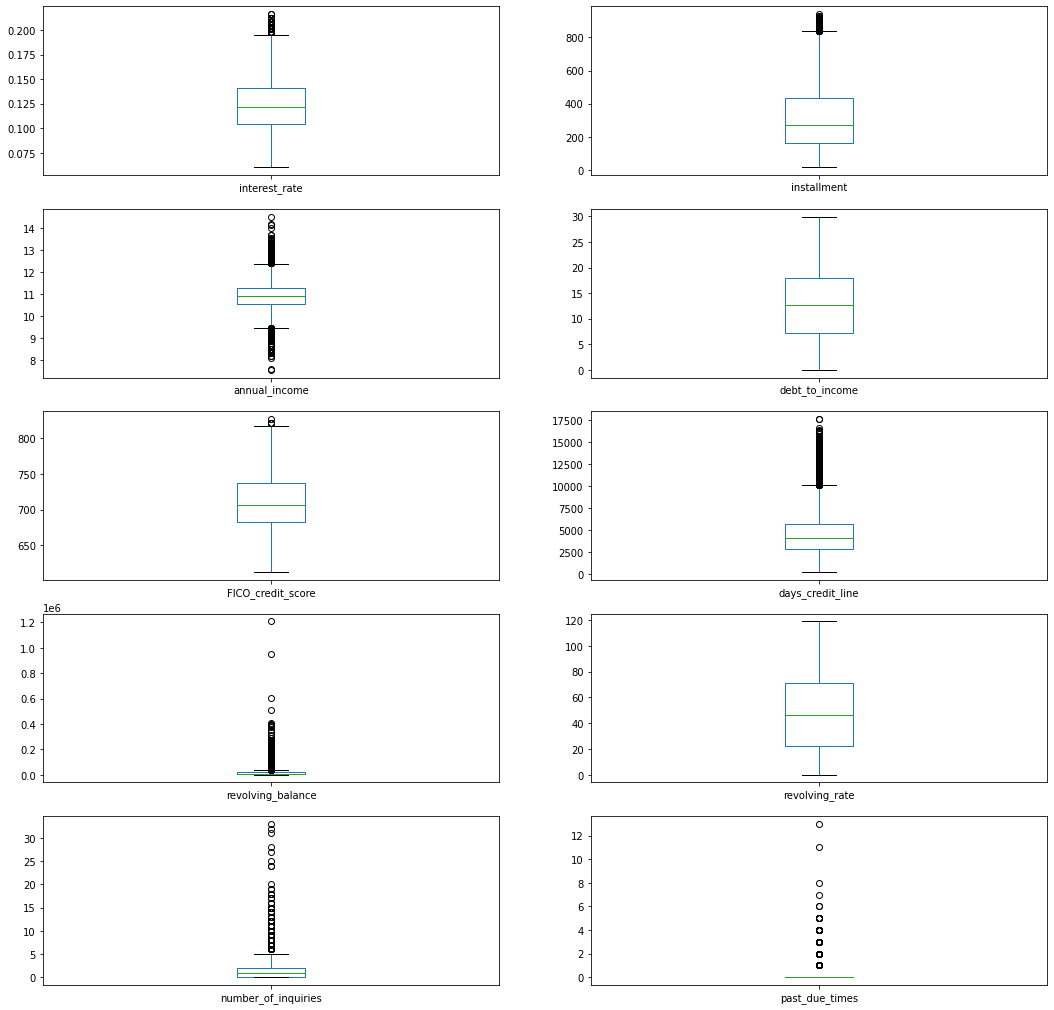

In [ ]:
#Checking outliers for continous columns and replacing them
data[continous_val].plot(kind='box',subplots=True, layout=(5,2), fontsize=10, figsize=(18,18))

In [ ]:
Outlier = ['interest_rate', 'installment', 'annual_income','FICO_credit_score', 'days_credit_line', 'revolving_balance', 'number_of_inquiries', 'past_due_times']
Q1=data[Outlier].quantile(0.25)
Q3=data[Outlier].quantile(0.75)
IQR=Q3-Q1
LL,UL = Q1-(IQR*1.5),Q3+(IQR*1.5)

for i in Outlier:
    data[i][data[i]>UL[i]]=UL[i];data[i][data[i]<LL[i]]=LL[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying

interest_rate             AxesSubplot(0.125,0.749828;0.352273x0.130172)
installment            AxesSubplot(0.547727,0.749828;0.352273x0.130172)
annual_income             AxesSubplot(0.125,0.593621;0.352273x0.130172)
debt_to_income         AxesSubplot(0.547727,0.593621;0.352273x0.130172)
FICO_credit_score         AxesSubplot(0.125,0.437414;0.352273x0.130172)
days_credit_line       AxesSubplot(0.547727,0.437414;0.352273x0.130172)
revolving_balance         AxesSubplot(0.125,0.281207;0.352273x0.130172)
revolving_rate         AxesSubplot(0.547727,0.281207;0.352273x0.130172)
number_of_inquiries          AxesSubplot(0.125,0.125;0.352273x0.130172)
past_due_times            AxesSubplot(0.547727,0.125;0.352273x0.130172)
dtype: object

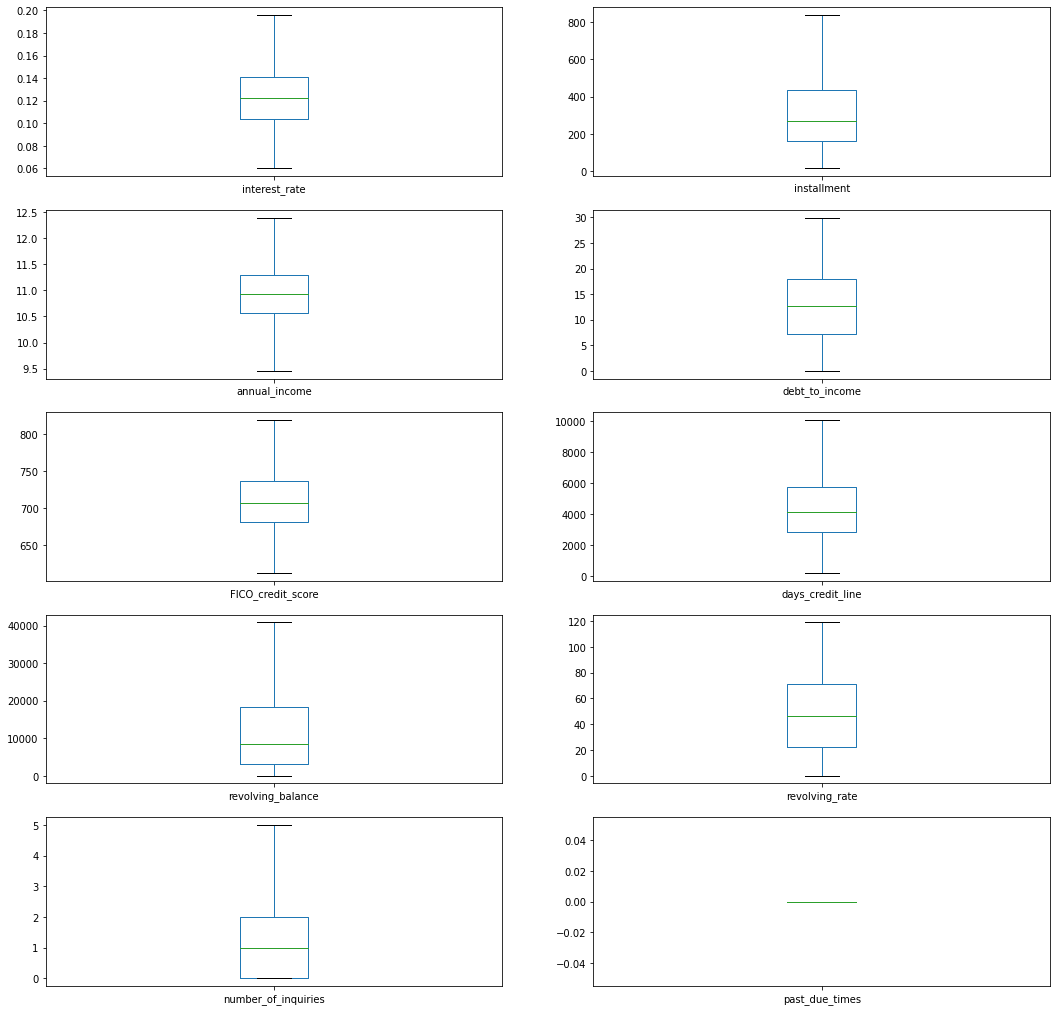

In [ ]:
#Checking outliers for continous columns and replacing them
data[continous_val].plot(kind='box',subplots=True, layout=(5,2), fontsize=10, figsize=(18,18))

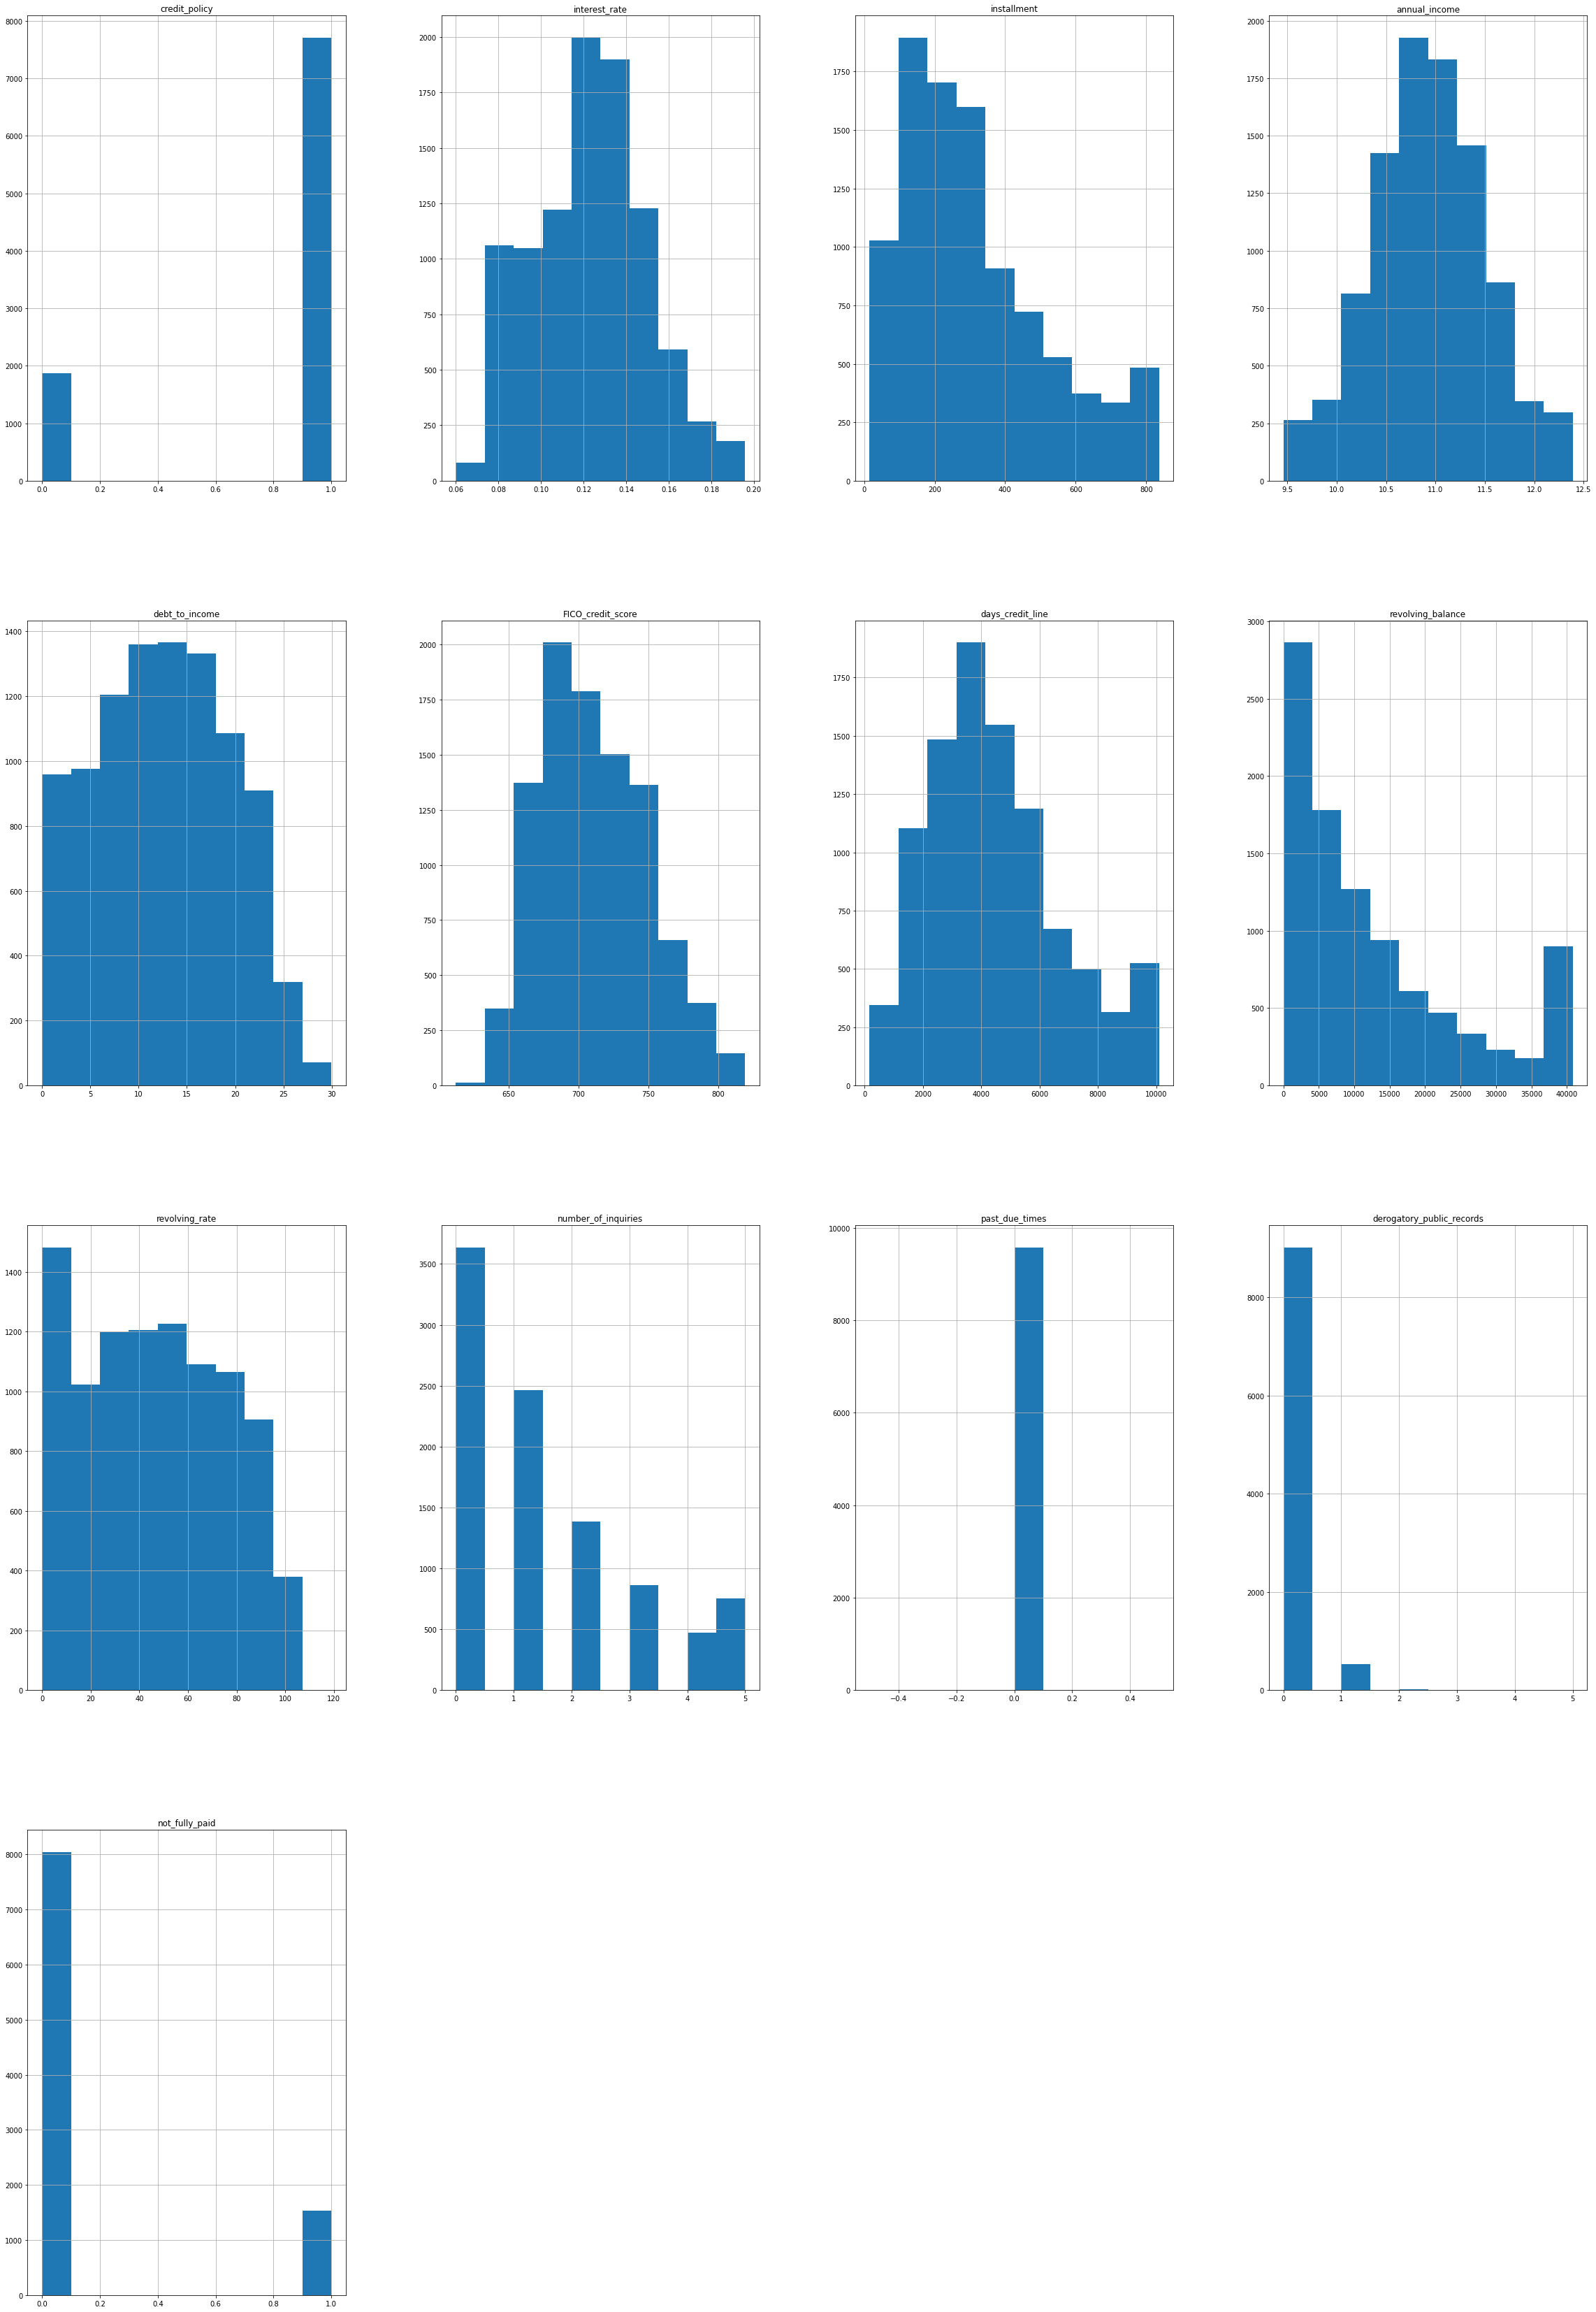

In [ ]:
data.hist(figsize=(40,60))
plt.show()

Text(0.5, 0, 'FICO_credit_score')

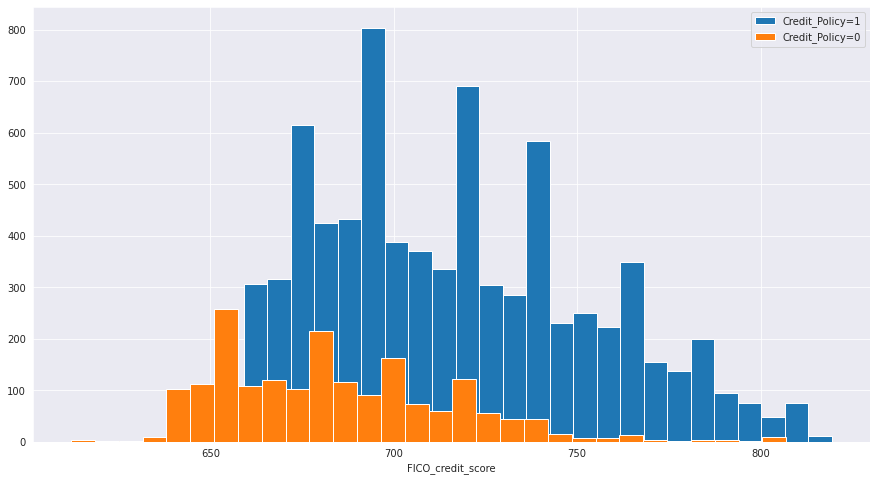

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.hist(data['FICO_credit_score'].loc[data['credit_policy']==1], bins=30, label='Credit_Policy=1')
plt.hist(data['FICO_credit_score'].loc[data['credit_policy']==0], bins=30, label='Credit_Policy=0')
plt.legend()
plt.xlabel('FICO_credit_score')

Text(0.5, 0, 'FICO_credit_score')

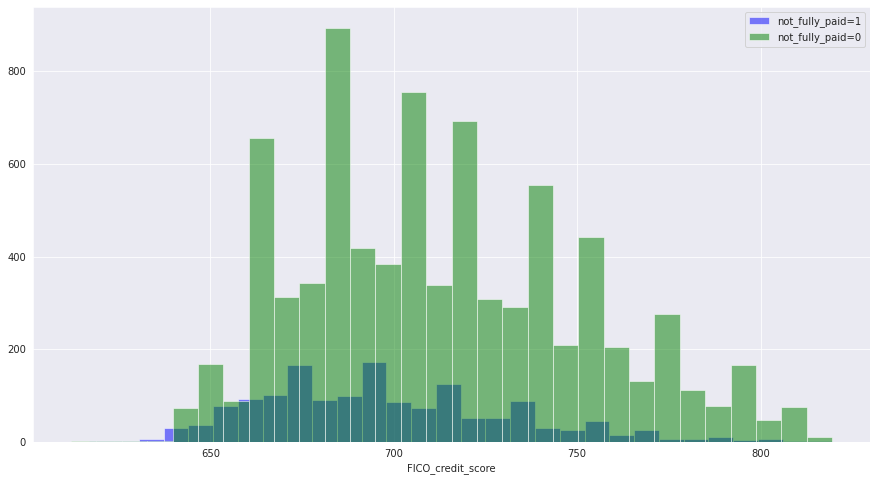

In [ ]:
plt.figure(figsize=(15,8))
data[data['not_fully_paid']==1]['FICO_credit_score'].hist(bins=30, alpha=0.5, color='blue', label='not_fully_paid=1')
data[data['not_fully_paid']==0]['FICO_credit_score'].hist(bins=30, alpha=0.5, color='green', label='not_fully_paid=0')
plt.legend()
plt.xlabel('FICO_credit_score')

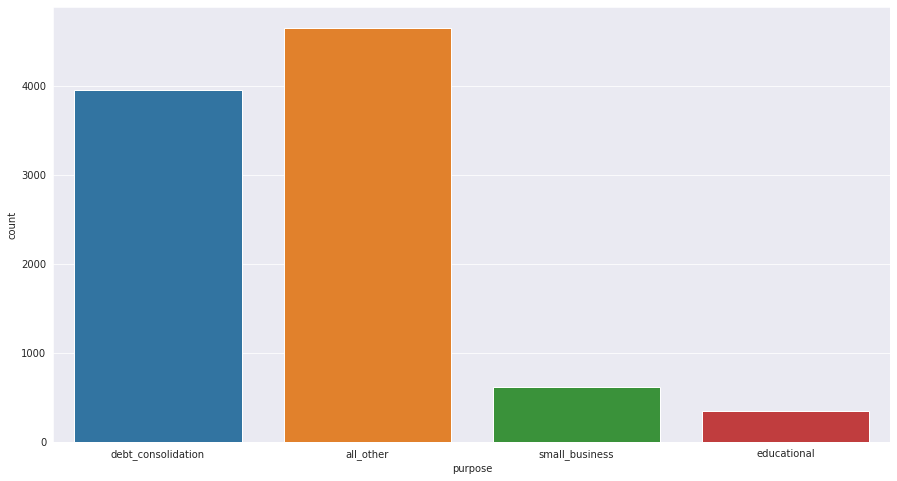

In [ ]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(15,8))
sns.countplot(data=data, x='purpose')

<Figure size 432x288 with 0 Axes>

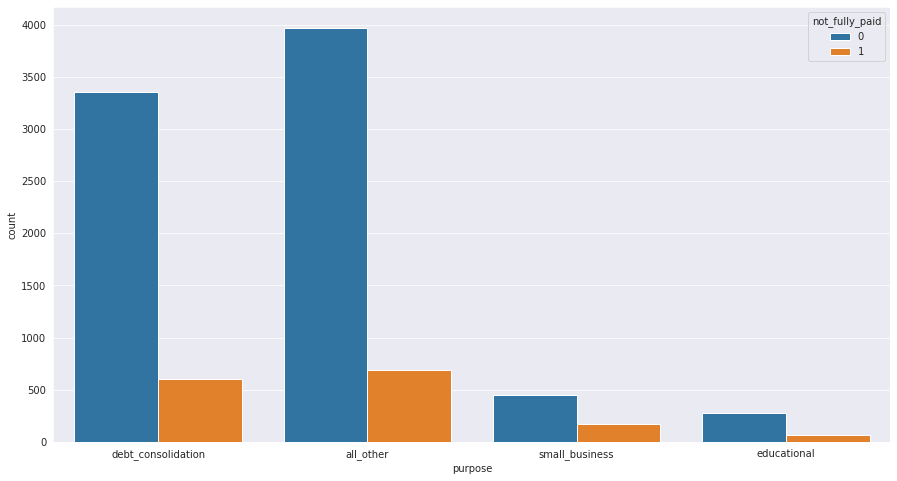

In [ ]:
plt.tight_layout()
plt.figure(figsize=(15,8))
sns.countplot(x='purpose',hue='not_fully_paid',data=data)

In [ ]:
data.corrwith(data['not_fully_paid'])

credit_policy               -0.158119
interest_rate                0.159463
installment                  0.048704
annual_income               -0.034226
debt_to_income               0.037362
FICO_credit_score           -0.149685
days_credit_line            -0.029747
revolving_balance            0.035042
revolving_rate               0.082088
number_of_inquiries          0.148974
past_due_times                    NaN
derogatory_public_records    0.048634
not_fully_paid               1.000000
dtype: float64

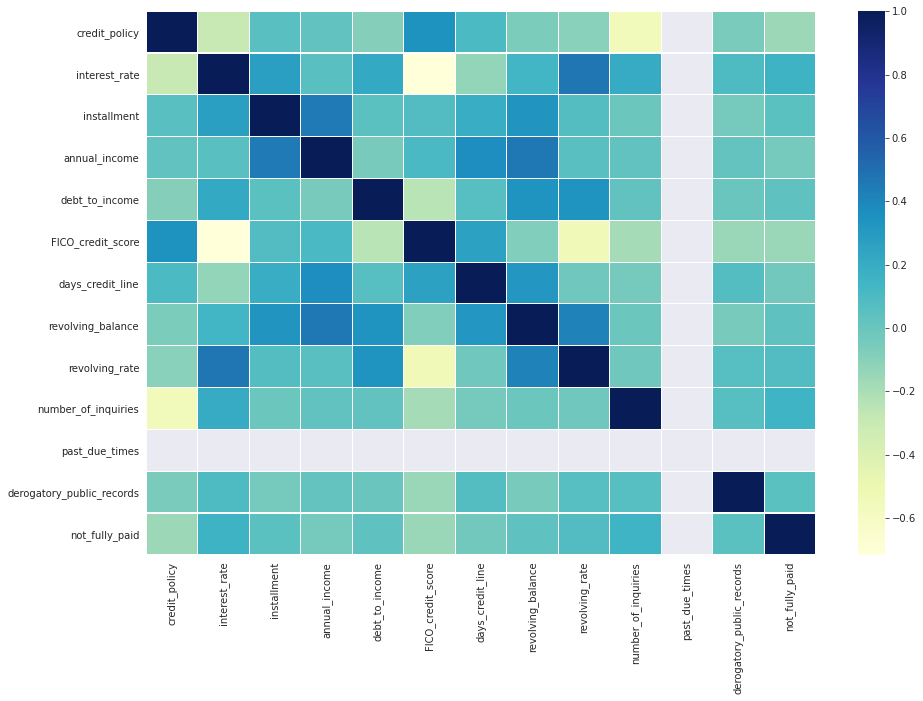

In [ ]:
corrmat = data.corr()

f, ax = plt.subplots(figsize =(15, 10))

sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
#Splitting the dataset into test and train set
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
y = data['not_fully_paid']
X = data.drop(['not_fully_paid','purpose','past_due_times'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.410827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not_fully_paid   No. Observations:                 6704
Model:                          Logit   Df Residuals:                     6693
Method:                           MLE   Df Model:                           10
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                 0.05181
Time:                        03:18:56   Log-Likelihood:                -2754.2
converged:                       True   LL-Null:                       -2904.7
Covariance Type:            nonrobust   LLR p-value:                 9.756e-59
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
credit_policy                -0.3233      0.101     -3.193      0.001      -0.

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
confusion_matrix(y_train, logistic_regression.predict(X_train))

array([[5657,    0],
       [1047,    0]])

In [ ]:
test_score_lm1 = accuracy_score(y_test,logistic_regression.predict(X_test)) * 100
test_score_lm1

83.08977035490605

In [ ]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

#checking performance of the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[1964  424]
 [ 385  101]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2388
           1       0.19      0.21      0.20       486

    accuracy                           0.72      2874
   macro avg       0.51      0.52      0.51      2874
weighted avg       0.73      0.72      0.72      2874



In [ ]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
predictionRF = rfc.predict(X_test)

#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))

[[2382    6]
 [ 476   10]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2388
           1       0.62      0.02      0.04       486

    accuracy                           0.83      2874
   macro avg       0.73      0.51      0.47      2874
weighted avg       0.80      0.83      0.76      2874

